# Homework 1

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from matplotlib.colors import ListedColormap
from seaborn import lineplot

# Loading Wine dataset

In [3]:
f1 = 'alcohol' 
f2 = 'malic_acid'

dataset = load_wine()
dataframe = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df_2 = dataframe[[f1,f2]]
df_2['label'] = dataset.target
df_2

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,alcohol,malic_acid,label
0,14.23,1.71,0
1,13.20,1.78,0
2,13.16,2.36,0
3,14.37,1.95,0
4,13.24,2.59,0
...,...,...,...
173,13.71,5.65,2
174,13.40,3.91,2
175,13.27,4.28,2
176,13.17,2.59,2


# 2D representation 

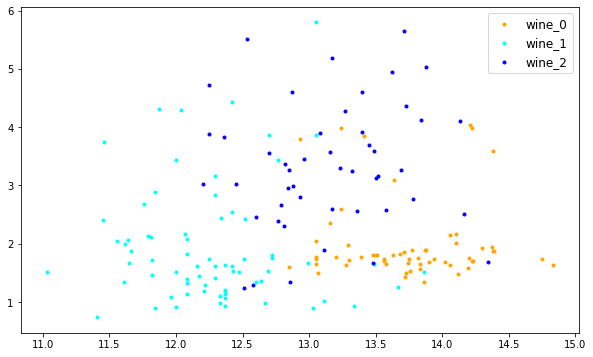

In [4]:
c_zero = df_2.loc[df_2['label'] == 0, ['alcohol','malic_acid']]
c_one = df_2.loc[df_2['label'] == 1, ['alcohol','malic_acid']]
c_two = df_2.loc[df_2['label'] == 2, ['alcohol','malic_acid']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(c_zero['alcohol'], c_zero['malic_acid'], s=9, color='orange', label = 'wine_0')
ax.scatter(c_one['alcohol'], c_one['malic_acid'], s=9, color='cyan', label = 'wine_1')
ax.scatter(c_two['alcohol'], c_two['malic_acid'], s=9, color='blue', label = 'wine_2')
plt.legend(loc='upper right', fontsize=12)
plt.show()

In [5]:
# Exploring the cardinality of the classes

len(c_zero), len(c_one), len(c_two)

(59, 71, 48)

# k-NN classification

In [6]:
# Splitting data in train, validation and test set

X, X_test, y, y_test = train_test_split(df_2[[f1,f2]], df_2['label'], train_size = 0.7, 
                                                    random_state = 42, shuffle = True)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.7, 
                                                    random_state = 42, shuffle = True)

# Decision boundaries

In [7]:
# Function for plotting decision boundaries

def plot_DB(clf, X_train, y_train):
    X_db = X_train.to_numpy()
    x_min, x_max = X_db[:, 0].min() - 1, X_db[:, 0].max() + 1
    y_min, y_max = X_db[:, 1].min() - 1, X_db[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_db[:, 0], X_db[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('alcohol')
    plt.ylabel('malic_acid')
    plt.show()

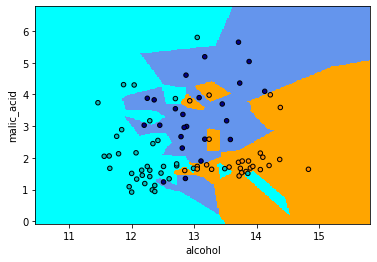

Classification report with k = 1
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.83      0.71      0.77        14
           2       0.60      0.60      0.60        10

    accuracy                           0.74        38
   macro avg       0.73      0.72      0.72        38
weighted avg       0.74      0.74      0.74        38



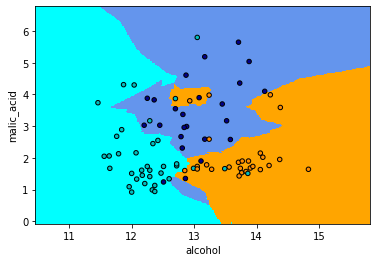

Classification report with k = 3
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.83      0.71      0.77        14
           2       0.78      0.70      0.74        10

    accuracy                           0.82        38
   macro avg       0.81      0.80      0.80        38
weighted avg       0.82      0.82      0.81        38



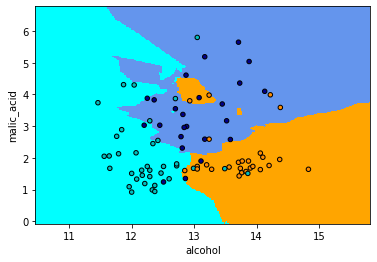

Classification report with k = 5
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.86      0.92        14
           2       1.00      0.90      0.95        10

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38



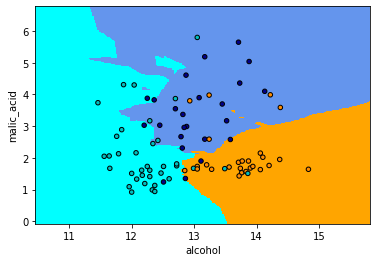

Classification report with k = 7
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.86      0.92        14
           2       0.90      0.90      0.90        10

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38



{1: 0.7368421052631579,
 3: 0.8157894736842105,
 5: 0.9210526315789473,
 7: 0.9210526315789473}

In [8]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

accuracies = {}
K = [1,3,5,7]
for k in K:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    plot_DB(clf, X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies[k] = accuracy
    print(f"Classification report with k = {k}")
    print(classification_report(y_val, y_pred))
accuracies

Text(0, 0.5, 'accuracy score on val')

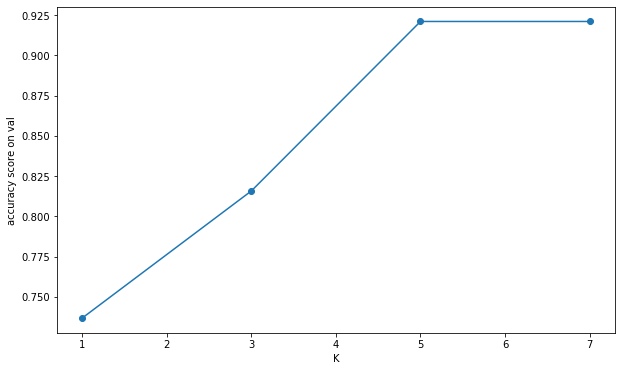

In [9]:
# Plotting accuracies on validation set vs k

f, ax = plt.subplots(1,figsize=(10,6))
ax.plot(K, list(accuracies.values()), label = "accuracy", marker='o')
plt.xlabel('K')
plt.ylabel('accuracy score on val')

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.94      0.81      0.87        21
           2       0.61      0.79      0.69        14

    accuracy                           0.80        54
   macro avg       0.80      0.79      0.79        54
weighted avg       0.82      0.80      0.80        54



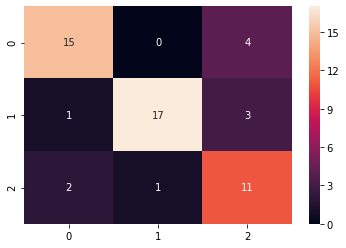

In [10]:
# Evaluating the model built with the best k

clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X, y)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

# Plotting the confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.94      0.76      0.84        21
           2       0.65      0.79      0.71        14

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.77        54
weighted avg       0.80      0.78      0.78        54



# SVM classification with linear kernel

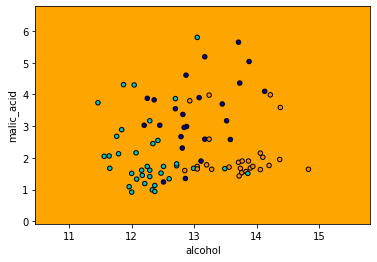

Classification report with C = 0.001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.37      1.00      0.54        14
           2       0.00      0.00      0.00        10

    accuracy                           0.37        38
   macro avg       0.12      0.33      0.18        38
weighted avg       0.14      0.37      0.20        38



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


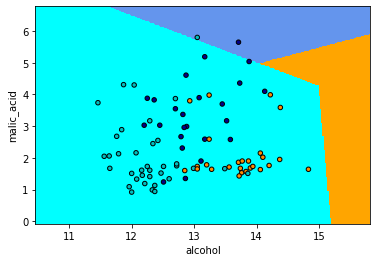

Classification report with C = 0.01
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.37      1.00      0.54        14
           2       0.00      0.00      0.00        10

    accuracy                           0.37        38
   macro avg       0.12      0.33      0.18        38
weighted avg       0.14      0.37      0.20        38



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


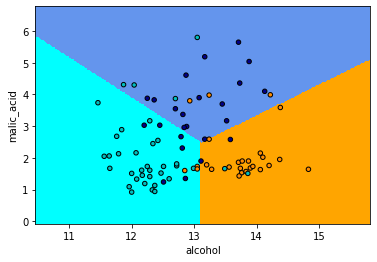

Classification report with C = 0.1
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.80      0.86      0.83        14
           2       0.89      0.80      0.84        10

    accuracy                           0.84        38
   macro avg       0.85      0.84      0.84        38
weighted avg       0.84      0.84      0.84        38



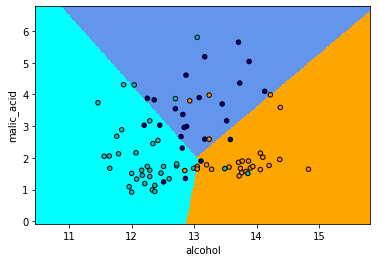

Classification report with C = 1
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.92      0.86      0.89        14
           2       0.80      0.80      0.80        10

    accuracy                           0.87        38
   macro avg       0.86      0.86      0.86        38
weighted avg       0.87      0.87      0.87        38



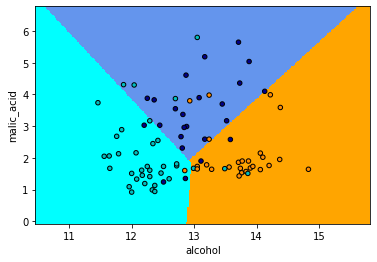

Classification report with C = 10
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.92      0.86      0.89        14
           2       0.88      0.70      0.78        10

    accuracy                           0.87        38
   macro avg       0.87      0.85      0.86        38
weighted avg       0.87      0.87      0.86        38



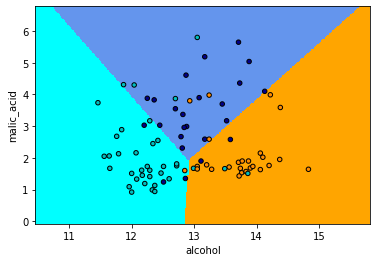

Classification report with C = 100
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.92      0.86      0.89        14
           2       0.88      0.70      0.78        10

    accuracy                           0.87        38
   macro avg       0.87      0.85      0.86        38
weighted avg       0.87      0.87      0.86        38



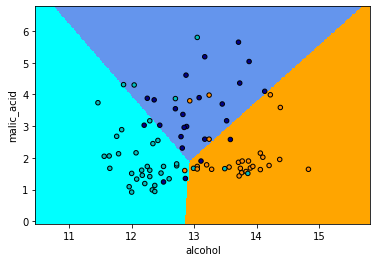

Classification report with C = 1000
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.92      0.86      0.89        14
           2       0.89      0.80      0.84        10

    accuracy                           0.89        38
   macro avg       0.90      0.89      0.89        38
weighted avg       0.90      0.89      0.89        38



{0.001: 0.3684210526315789,
 0.01: 0.3684210526315789,
 0.1: 0.8421052631578947,
 1: 0.868421052631579,
 10: 0.868421052631579,
 100: 0.868421052631579,
 1000: 0.8947368421052632}

In [62]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracies = {}

for c in C:
    clf = SVC(kernel='linear',C=c)
    clf.fit(X_train, y_train)
    plot_DB(clf, X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies[c] = accuracy
    print(f"Classification report with C = {c}")
    print(classification_report(y_val, y_pred))
accuracies

Text(0, 0.5, 'accuracy score on val')

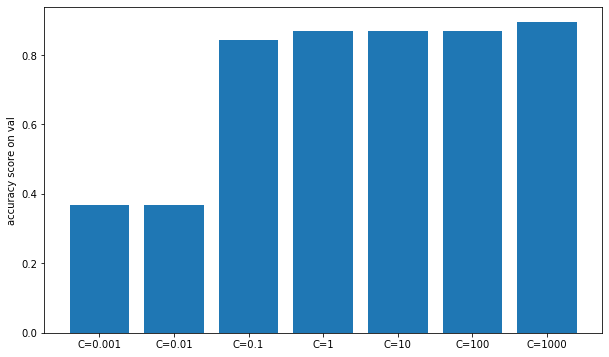

In [70]:
# Plotting accuracies on validation set vs C 

f, ax = plt.subplots(1,figsize=(10,6))
x_axis = np.arange(len(C))
y_axis = list(accuracies.values())
plt.bar(x_axis,y_axis)
plt.xticks(x, ('C=0.001', 'C=0.01', 'C=0.1', 'C=1', 'C=10', 'C=100', 'C=1000'))
plt.ylabel('accuracy score on val')

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.89      0.76      0.82        21
           2       0.62      0.57      0.59        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.75      0.74      0.74        54



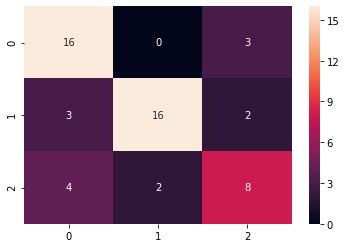

In [71]:
# Evaluating best C on validation set

clf = SVC(C = 1000, kernel='linear')
clf.fit(X, y)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

# SVM classification with RBF kernel

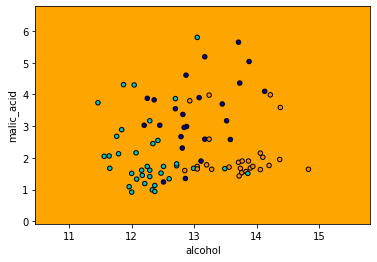

Classification report with C = 0.001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.37      1.00      0.54        14
           2       0.00      0.00      0.00        10

    accuracy                           0.37        38
   macro avg       0.12      0.33      0.18        38
weighted avg       0.14      0.37      0.20        38



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


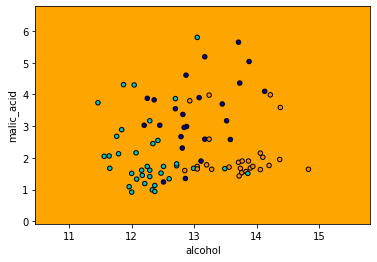

Classification report with C = 0.01
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.37      1.00      0.54        14
           2       0.00      0.00      0.00        10

    accuracy                           0.37        38
   macro avg       0.12      0.33      0.18        38
weighted avg       0.14      0.37      0.20        38



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


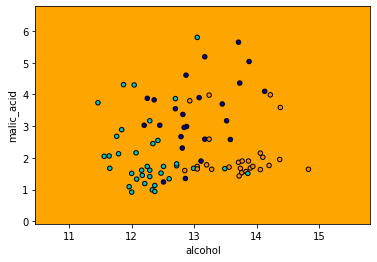

Classification report with C = 0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.37      1.00      0.54        14
           2       0.00      0.00      0.00        10

    accuracy                           0.37        38
   macro avg       0.12      0.33      0.18        38
weighted avg       0.14      0.37      0.20        38



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


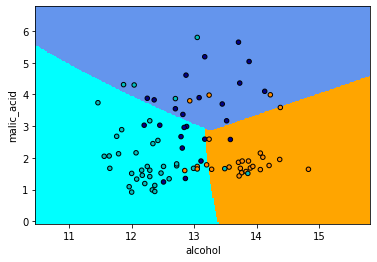

Classification report with C = 1
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.80      0.86      0.83        14
           2       0.89      0.80      0.84        10

    accuracy                           0.84        38
   macro avg       0.85      0.84      0.84        38
weighted avg       0.84      0.84      0.84        38



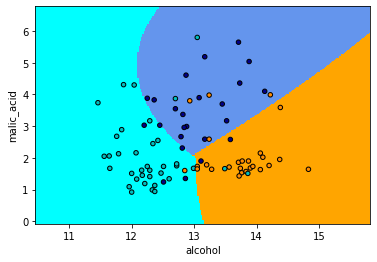

Classification report with C = 10
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.92      0.86      0.89        14
           2       0.89      0.80      0.84        10

    accuracy                           0.89        38
   macro avg       0.90      0.89      0.89        38
weighted avg       0.90      0.89      0.89        38



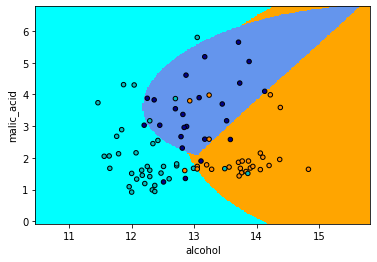

Classification report with C = 100
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.92      0.86      0.89        14
           2       0.88      0.70      0.78        10

    accuracy                           0.87        38
   macro avg       0.87      0.85      0.86        38
weighted avg       0.87      0.87      0.86        38



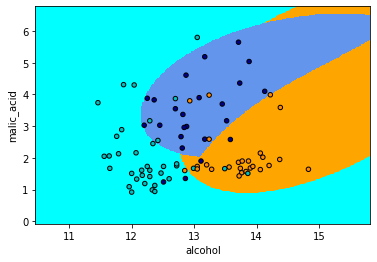

Classification report with C = 1000
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.92      0.79      0.85        14
           2       0.73      0.80      0.76        10

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.83        38
weighted avg       0.85      0.84      0.84        38



{0.001: 0.3684210526315789,
 0.01: 0.3684210526315789,
 0.1: 0.3684210526315789,
 1: 0.8421052631578947,
 10: 0.8947368421052632,
 100: 0.868421052631579,
 1000: 0.8421052631578947}

In [72]:
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]
accuracies = {}

for c in C:
    clf = SVC(kernel = 'rbf', C=c)
    clf.fit(X_train, y_train)
    plot_DB(clf, X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies[c] = accuracy
    print(f"Classification report with C = {c}")
    print(classification_report(y_val, y_pred))
accuracies

# Evaluating the best C on the test set

In [73]:
clf = SVC(C = 10, kernel='rbf')
clf.fit(X, y)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.90      0.86      0.88        21
           2       0.62      0.57      0.59        14

    accuracy                           0.78        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.78      0.78      0.78        54



# Gamma and C parameter tuning for RBF kernel

In [76]:
clf = SVC(C = 100, gamma=1e-2, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(accuracy_score(y_val, y_pred))

0.8947368421052632


In [77]:
# Grid search

param_grid = {'C': [0.01,0.1,1,10,100], 'gamma': [1e-7,1e-5,1e-3,1e-1,1e-0], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}")

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


# Training the model with tuned parameters and scoring on val_set

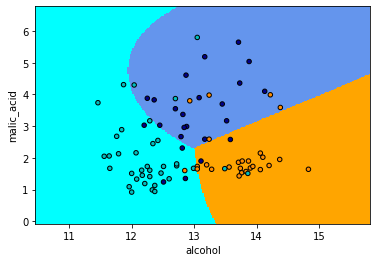

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.90      0.86      0.88        21
           2       0.62      0.57      0.59        14

    accuracy                           0.78        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.78      0.78      0.78        54



In [80]:
clf = SVC(C=1, gamma=1e-1, kernel = 'rbf')
clf.fit(X_train, y_train)

plot_DB(clf, X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

# KFold

In [81]:
param_grid = {'C': [0.01,0.1,1,10,100], 'gamma': [1e-7,1e-5,1e-3,1e-1,1e-0], 'kernel': ['rbf']}
cv = KFold(n_splits=5, shuffle=True)
grid = GridSearchCV(SVC(), param_grid, cv=cv)
grid.fit(X, y)
print(f"Best params: {grid.best_params_}")

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.90      0.90        21
           2       0.62      0.71      0.67        14

    accuracy                           0.81        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.82      0.81      0.82        54



# Extra section

# Data normalization

In [85]:
scaler = RobustScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)
scaled_df['label'] = dataset.target

means_df = pd.DataFrame(columns=scaled_df.columns)
for c in scaled_df.columns:
    l = []
    for label in [0,1,2]:
        l.append(scaled_df.loc[scaled_df['label'] == label, c].mean())
    means_df[c] = l

print("STANDARD DEVIATION OF THE MEANS FOR EACH CLASS LABEL\n")
for c in means_df.columns:
    print(f"std of {c} : {means_df[c].std()}")
    
means_df

STANDARD DEVIATION OF THE MEANS FOR EACH CLASS LABEL

std of alcohol : 0.5608957454375054
std of malic_acid : 0.5319998199893525
std of ash : 0.3359198407960505
std of alcalinity_of_ash : 0.5270139099981319
std of magnesium : 0.31215474344237315
std of total_phenols : 0.5491346047182014
std of flavanoids : 0.6625355979557053
std of nonflavanoid_phenols : 0.470476241411944
std of proanthocyanins : 0.539542547703261
std of color_intensity : 0.7252251418431693
std of hue : 0.6440362266690655
std of od280/od315_of_diluted_wines : 0.6219944833978461
std of proline : 0.6546782382808348
std of label : 1.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,0.528324,0.098431,0.275088,-0.572724,0.438894,0.458789,0.507409,-0.298507,0.491889,0.281310,0.287508,0.306529,0.912718,0.0
1,-0.586515,0.045727,-0.331543,0.171634,-0.181616,-0.090900,-0.032428,0.141266,0.107545,-0.538047,0.270464,0.004342,-0.317839,1.0
2,0.078897,0.992399,0.221823,0.445736,0.069079,-0.639480,-0.810504,0.641791,-0.573512,0.908138,-0.836420,-0.889621,-0.089998,2.0


# 2D plot

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


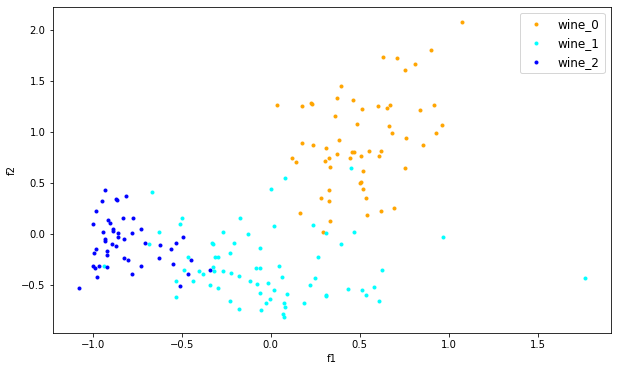

In [86]:
f1 = 'flavanoids'
f2 = 'proline'

normdf_2 = scaled_df[[f1,f2]]
normdf_2['label'] = dataset.target

c_zero = normdf_2.loc[df_2['label'] == 0, [f1,f2]]
c_one = normdf_2.loc[df_2['label'] == 1, [f1,f2]]
c_two = normdf_2.loc[df_2['label'] == 2, [f1,f2]]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(c_zero[f1], c_zero[f2], s=9, color='orange', label = 'wine_0')
ax.scatter(c_one[f1], c_one[f2], s=9, color='cyan', label = 'wine_1')
ax.scatter(c_two[f1], c_two[f2], s=9, color='blue', label = 'wine_2')
plt.legend(loc='upper right', fontsize=12)
ax.set_xlabel("f1")
ax.set_ylabel("f2")
plt.show()

In [95]:
# Splitting data in train and test set

X, X_test, y, y_test = train_test_split(normdf_2[[f1,f2]], normdf_2['label'], train_size = 0.7, 
                                                    random_state = 42, shuffle = True)

# k-NN

In [106]:
param_grid = {'n_neighbors': [3,5,7,9]}
cv = KFold(n_splits=5, shuffle=True)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)
grid.fit(X, y)
print(f"Best params: {grid.best_params_}")

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

Best params: {'n_neighbors': 5}
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.89      0.76      0.82        21
           2       0.86      0.86      0.86        14

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



# SMV with linear kernel

In [105]:
param_grid = {'C': [0.01,0.1,1,10,100], 'kernel': ['linear']}
cv = KFold(n_splits=5, shuffle=True)
grid = GridSearchCV(SVC(), param_grid, cv=cv)
grid.fit(X, y)
print(f"Best params: {grid.best_params_}")

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

Best params: {'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.90      0.90      0.90        21
           2       0.92      0.86      0.89        14

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



# SMV with rbf kernel

In [104]:
param_grid = {'C': [0.01,0.1,1,10,100], 'gamma': [1e-7,1e-5,1e-3,1e-1,1e-0], 'kernel': ['rbf']}
cv = KFold(n_splits=5, shuffle=True)
grid = GridSearchCV(SVC(), param_grid, cv=cv)
grid.fit(X, y)
print(f"Best params: {grid.best_params_}")

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

Best params: {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      0.90      0.93        21
           2       0.87      0.93      0.90        14

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54

